In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import feather

In [2]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

## Initial Exploratory Data Analysis
Let's do some basic feature engineering and feature generation to get more insights about the data that the model can learn from.

In [3]:
df = feather.read_dataframe('./vars/df.feather')
df_test = feather.read_dataframe('./vars/df_test.feather')

In [4]:
display_all(df.head(10))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_N,CentralAir_Y,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,1,60.0,3.0,65.000000,8450.0,2.0,2.0,5.0,7.0,5.0,2003,2003,1.0,12.0,13.0,196.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,706.0,-1.0,0.0,150.0,856.0,1.0,-1.0,5.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,-1.0,8.0,6.0,0.0,-1.0,2.0,2003,2.0,548.0,-1.0,-1.0,0.0,61.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,2.0,2008,8.0,4.0,208500.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,20.0,3.0,80.000000,9600.0,1.0,2.0,2.0,6.0,8.0,1976,1976,1.0,8.0,8.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,978.0,-1.0,0.0,284.0,1262.0,1.0,-1.0,5.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,-1.0,6.0,6.0,1.0,-1.0,2.0,1976,2.0,460.0,-1.0,-1.0,298.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,5.0,2007,8.0,4.0,181500.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,60.0,3.0,68.000000,11250.0,2.0,2.0,5.0,7.0,5.0,2001,2002,1.0,12.0,13.0,162.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,486.0,-1.0,0.0,434.0,920.0,1.0,-1.0,5.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,-1.0,6.0,6.0,1.0,-1.0,2.0,2001,2.0,608.0,-1.0,-1.0,0.0,42.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,9.0,2008,8.0,4.0,223500.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,70.0,3.0,60.000000,9550.0,2.0,2.0,5.0,7.0,5.0,1915,1970,1.0,13.0,15.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,216.0,-1.0,0.0,540.0,756.0,1.0,-1.0,5.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,-1.0,7.0,6.0,1.0,-1.0,6.0,1998,3.0,642.0,-1.0,-1.0,0.0,35.0,272.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,2.0,2006,8.0,0.0,140000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60.0,3.0,84.000000,14260.0,2.0,2.0,5.0,8.0,5.0,2000,2000,1.0,12.0,13.0,350.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,655.0,-1.0,0.0,490.0,1145.0,1.0,-1.0,5.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,-1.0,9.0,6.0,1.0,-1.0,2.0,2000,3.0,836.0,-1.0,-1.0,192.0,84.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,12.0,2008,8.0,4.0,250000.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

## Feature Generation
There are a few features that stand out initially that we can create.
### Age of Homes
Let's dive into the date aspect of the houses, such as YearBuilt, year remodelled and year sold.

Let's Assume homes that were built 50 years ago are considered "old" homes. It is no surprise that homes that are condisered old (even though they were remodelled) will usually get sold for less because of the structrual risk of the house. This can be proven in the plot below.

The `remod_to_built_diff` get the difference between the year the house was remodelled to the year it was built, this could be handy because it could give us an insight how the SalePrice is affected on houses that were built a long time ago but were re-modelled recently.

The `remod_to_sold_diff` gets the time it took to sell the house from when the house was remodelled, some people specifically re-model that house in order to sell it, others don't remodel at all and sell it, this may have a significant affect on the SalePrice.

`is_home_old` is a subjective feature, after reading some articles I found on popular consensus that houses that are more that 50 years old are consisdered "old", not all people feel this way (it is heavily dependant on the place of residence). However for initial analysis let's go with this assumption

In [5]:
df['remod_to_built_diff'] = df['YearRemodAdd'] - df['YearBuilt']
df['remod_to_sold_diff']= df['YrSold'] - df['YearRemodAdd']
df['is_home_old'] = ((2018 - df['YearBuilt']) > 50) * 1

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


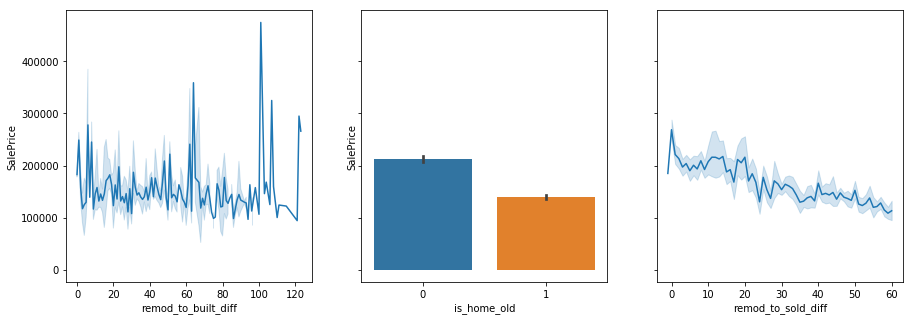

In [6]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row')
sns.lineplot(x='remod_to_built_diff', y='SalePrice', data=df,ax=ax[0])
sns.barplot(x='is_home_old', y='SalePrice', data=df,ax=ax[1])
sns.lineplot(x='remod_to_sold_diff', y='SalePrice', data=df, ax=ax[2])
fig.set_size_inches(15,5)

### Results

From the graph above we can see that older homes get sold for less, and the higher the difference between the year the house was remodelled and sold, decreases the sale price, ie newer homes get sold for more. 

There is no real insight in the `remod_to_built_diff` so we will drop it.

We need to apply the same features to the test set as well. There are way better ways to do this, like combine both dataframes, do EDA and then split them out again, or write methods that perform these transformations on multiple datasets, but for now let's just hack it out!

In [7]:
df.drop('remod_to_built_diff', axis=1, inplace=True)

df_test['remod_to_sold_diff']= df_test['YrSold'] - df_test['YearRemodAdd']
df_test['is_home_old'] = ((2018 - df_test['YearBuilt']) > 50) * 1

## Size of Houses
We have quite a few features regarding the area of the house such as `LotArea` and `GrLivArea`, these could give us valuable insights of how they affect the sale price.

The `GrLivArea` feature gives us the total area of the Livable home (ie the actual house), with this info we can get a approxmation on how big the rooms are in square_ft. Since `TotRmsAbvGrd` excludes bathrooms we will leave it as it is, because bathrooms are usually a lot smaller than the actual rooms.
Plotting the `area_per_room` and `SalePrice` we can see a linear correlation between the two, this makes sense. However it does seem like there are a few outliers in the training set, this could mess up the linear correlation between the two variables, so the best thing to do it clip the variables by their 1 and 99th percentile. We see the two resulting graphs below.

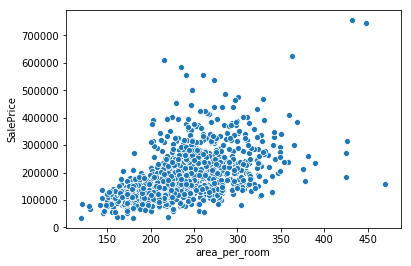

In [8]:
df['area_per_room'] = df.GrLivArea / df.TotRmsAbvGrd
sns.scatterplot(x='area_per_room', y='SalePrice', data=df)


In [9]:
lowerbound, upperbound = np.percentile(df['area_per_room'], [1,99])
df['area_per_room'] = np.clip(df['area_per_room'], lowerbound, upperbound)

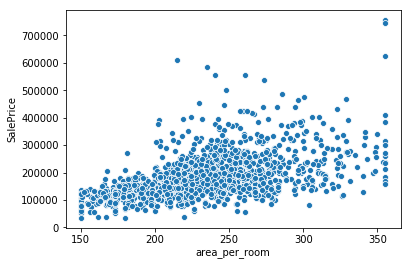

In [10]:
sns.scatterplot(x='area_per_room', y='SalePrice', data=df)

### Lot Area and Living Area
The `LotArea` and `GrLivArea` can be thought of as a ratio of how big the house is compared to the total land, this gives a good estimate the area outside the living space, ie backyard space, patio etc. The assumption is the smaller the ratio the more the more space the house has (for extension etc). Let's have a look at some plots to see how they look. From the histogram plot, most houses have a 20% living area to lot area ratio. which seems to be quite normal.

In [11]:
df['living_area_per_lot_size'] = df.GrLivArea / df.LotArea

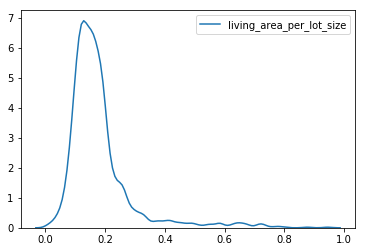

In [12]:
sns.kdeplot(df['living_area_per_lot_size'])

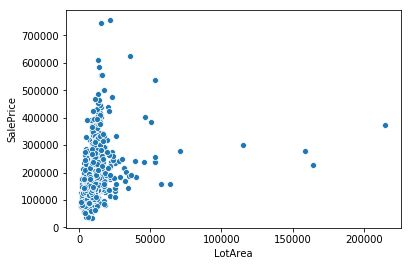

In [13]:
sns.scatterplot('LotArea', 'SalePrice', data=df)

The `LotArea` has quite a few outliers, which tends to squash up the values in a vertical line, the best fix would be to clip these outliers. The massive outlier (past 200000) doesn't have a significant effect on the SalePrice anyway, so this can be clipped to th 99th Percentile. I'm not sure how this will effect the model, but we shall see :)

In [14]:
lb, ub = np.percentile(df['GrLivArea'], [1,99])
lb_la, ub_la = np.percentile(df['LotArea'], [1,99])
df['GrLivArea'] = np.clip(df['GrLivArea'], lb, ub)
df['LotArea'] = np.clip(df['LotArea'], lb, ub)

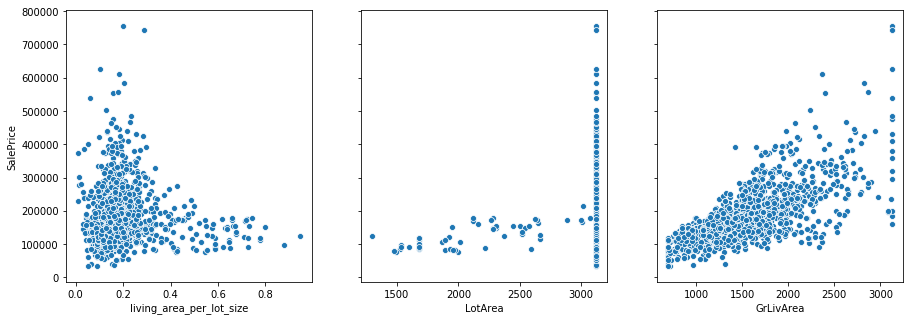

In [15]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row')
sns.scatterplot('living_area_per_lot_size', 'SalePrice', data=df, ax=ax[0])
sns.scatterplot('LotArea', 'SalePrice', data=df, ax=ax[1])
sns.scatterplot('GrLivArea', 'SalePrice', data=df, ax=ax[2])
fig.set_size_inches(15,5)

### More Dates
There is a month sold feature, it would be quite interesting to see in which months most houses get sold. From the plot below most houses get sold around summertime in June, however this won't have a profound affect on the sale price so maybe this isn't a feature we need to concern ourselves with.

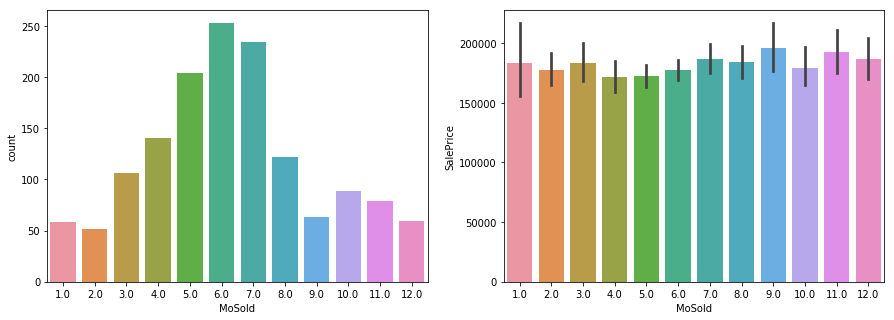

In [16]:
fig, ax = plt.subplots(1, 2)
sns.countplot(x='MoSold', data=df,ax=ax[0])
sns.barplot(x='MoSold', y='SalePrice', data=df, ax=ax[1])
fig.set_size_inches(15,5)

## Apply transformations to test set
We still need to apply these transformations to the test set, so let's do that now.

In [17]:
df_test['area_per_room'] = df_test.GrLivArea / df_test.TotRmsAbvGrd
lowerbound, upperbound = np.percentile(df['area_per_room'], [1,99])
df['area_per_room'] = np.clip(df['area_per_room'], lowerbound, upperbound)

In [18]:
df_test['living_area_per_lot_size'] = df_test.GrLivArea / df_test.LotArea

In [19]:
lb, ub = np.percentile(df_test['GrLivArea'], [1,99])
lb_la, ub_la = np.percentile(df_test['LotArea'], [1,99])
df_test['GrLivArea'] = np.clip(df_test['GrLivArea'], lb, ub)
df_test['LotArea'] = np.clip(df_test['LotArea'], lb, ub)

In [20]:
feather.write_dataframe(df, './vars/df_post_eda.feather')

In [21]:
feather.write_dataframe(df, './vars/df_test_post_eda.feather')

## Conclusions
This was quite a basic EDA to get a model up and running, there were more coniderations we can come back to, one was getting the price per square ft: `df['price_per_ft_2'] = df['LotArea'] / df['SalePrice']` however this cannot be applied to the test set because the test set does not have `SalePrice`, so we could have calculated the average price per square ft.

Another consideration was to get the Neighborhood variable, and get the average `SalePrice`, `LotArea`, etc for each neighborhood, as this could have a reasonable effect on the model. We will come back to that.